In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jk import *
from utils import *
import matplotlib as mpl
import matplotlib.gridspec as gridspec

NT=64

mpl.rcParams.update({'font.size': 12})

In [3]:
kappa="k0p1542"
print(np.array(get_data(kappa,5,NT)).shape)
kappa="k0p15446"
print(np.array(get_data(kappa,5,NT)).shape)
kappa="k0p15464"
print(np.array(get_data(kappa,5,NT)).shape)

(196, 32)
(151, 32)
(90, 32)


In [4]:
data = {}
kappas=["k0p1542", "k0p15446", "k0p15464"]
for kappa in kappas:
    data[kappa]={5: np.array(get_data(kappa,5,NT))}
    for i in range(3):
        data[kappa][i]=np.array(get_data(kappa,i+1,NT))
    
for i in [0,1,2,5]:
    data["k0p1542"][i]=data["k0p1542"][i][16:]
    data["k0p15446"][i]=data["k0p15446"][i][11:]
    data["k0p15464"][i]=data["k0p15464"][i][10:]

In [5]:
print(data["k0p1542"][5].shape)
print(data["k0p15446"][5].shape)
print(data["k0p15464"][5].shape)

(180, 32)
(140, 32)
(80, 32)


/home/chris/Code/LQCD/su4_hmc_analysis/MesonFitting/utils.py:40: RuntimeWarning: divide by zero encountered in log
  res.append(np.log(avg[t]/avg[t+1]))
/home/chris/anaconda3/envs/LQCD/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


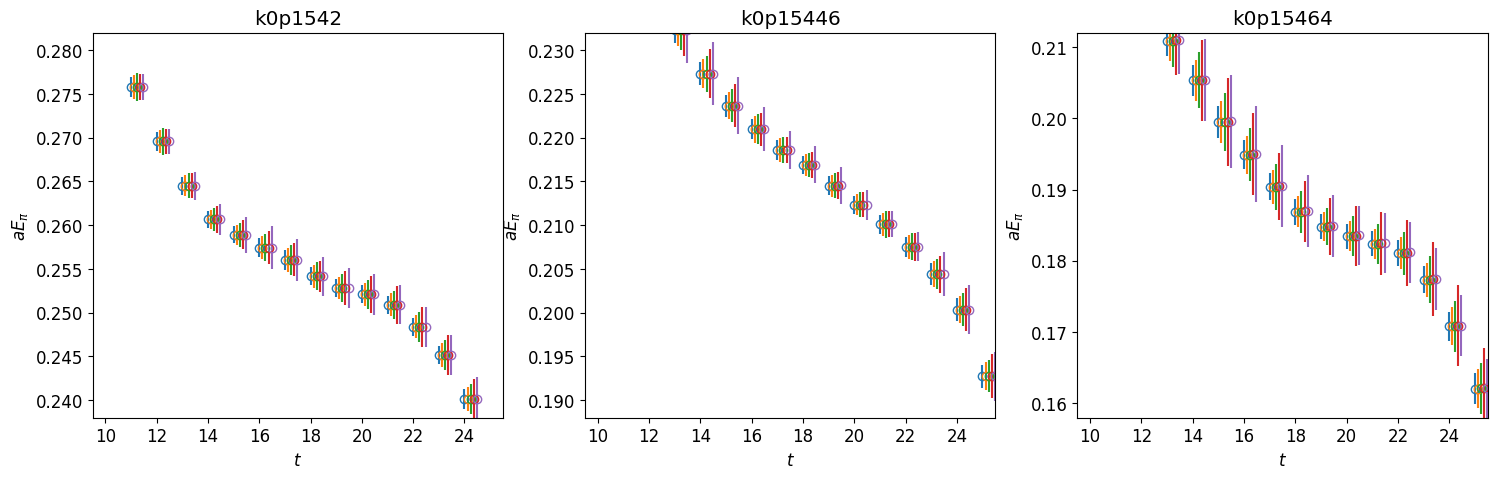

In [6]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(1,3)
ylims={"k0p1542": (0.238,0.282), "k0p15446": (0.188,0.232), "k0p15464": (0.158,0.212)}
for i,kappa in enumerate(kappas):
    ax=fig.add_subplot(gs[i])
    cut=0
    corr=data[kappa][5]
    for i,b in enumerate([1,2,4,10,20]):
        d=jackKnife(log_eff_mass, corr[cut:,:], b)
        ax.errorbar([t+0.12*i for t in range(int(NT/2)-1)], d[0], d[1], linestyle="None", marker="o", markerfacecolor="None")
        ax.set_ylim(ylims[kappa])
        ax.set_xlim(9.5,25.5)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$aE_{\pi}$')
    ax.set_title(kappa)

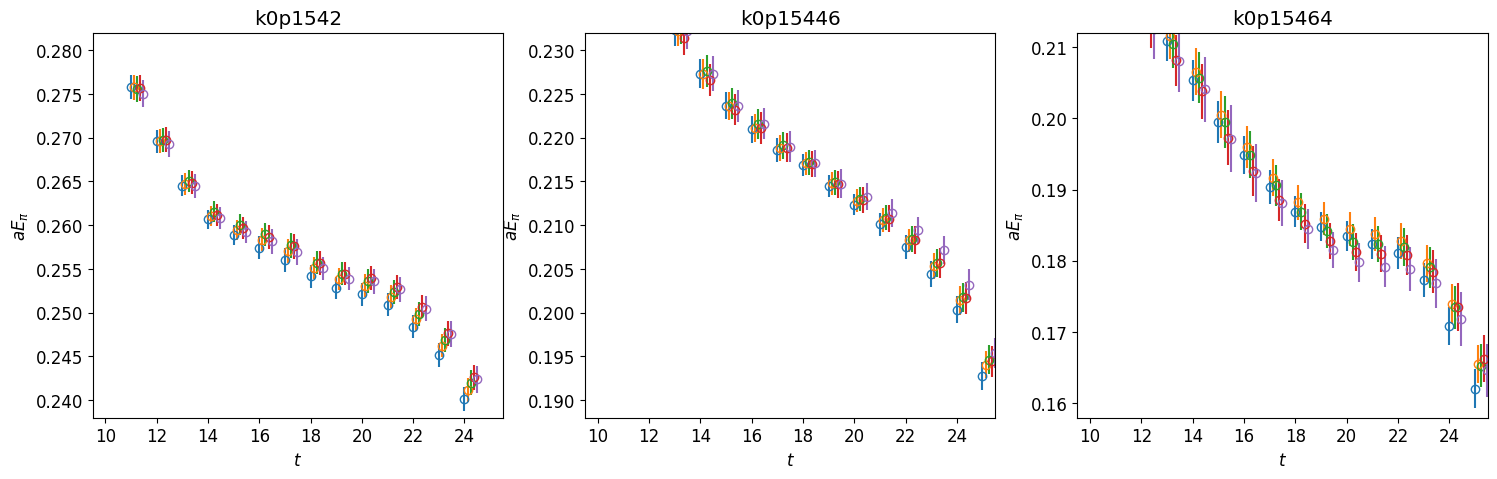

In [7]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(1,3)
ylims={"k0p1542": (0.238,0.282), "k0p15446": (0.188,0.232), "k0p15464": (0.158,0.212)}
for i,kappa in enumerate(kappas):
    ax=fig.add_subplot(gs[i])

    corr=data[kappa][5]
    for i,cut in enumerate([0,10,20,30,40]):
        d=jackKnife(log_eff_mass, corr[cut:,:], 2)
        ax.errorbar([t+0.12*i for t in range(int(NT/2)-1)], d[0], d[1], linestyle="None", marker="o", markerfacecolor="None")
        ax.set_ylim(ylims[kappa])
        ax.set_xlim(9.5,25.5)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$aE_{\pi}$')
    ax.set_title(kappa)

## FITS

In [13]:
kappa="k0p1542"
corrPI=data[kappa][5]
corrRHO=(data[kappa][0]+data[kappa][1]+data[kappa][2])/3.0
ts = np.array([t for t in range(int(NT/2))])

cut=20
bin=4

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData, NT)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData, NT)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData, NT)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData, NT)

pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

/home/chris/Code/LQCD/su4_hmc_analysis/MesonFitting/utils.py:92: RuntimeWarning: overflow encountered in exp
  return p['a0']*np.exp(-p['E0']*t)+p['a1']*np.exp(-p['E1']*t)+p['a2']*np.exp(-p['E2']*t)
/home/chris/Code/LQCD/su4_hmc_analysis/MesonFitting/utils.py:92: RuntimeWarning: overflow encountered in multiply
  return p['a0']*np.exp(-p['E0']*t)+p['a1']*np.exp(-p['E1']*t)+p['a2']*np.exp(-p['E2']*t)
/home/chris/Code/LQCD/su4_hmc_analysis/MesonFitting/utils.py:40: RuntimeWarning: divide by zero encountered in log
  res.append(np.log(avg[t]/avg[t+1]))


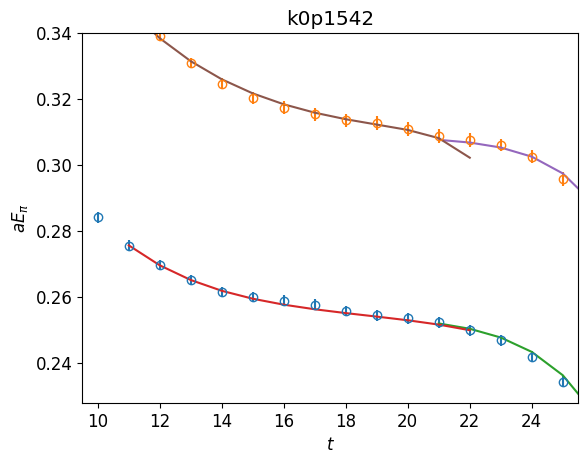

6.44824917304993 {'a': 0.0000681(19), 'E': 0.2545(12)}
9.218473436834664 {'a0': 2(41)e-07, 'E0': -0.14(84), 'a1': 0.112(14), 'E1': 0.2540(67), 'a2': 0.39(26), 'E2': 0.60(11)}
3.3179726856340155 {'a': 2.965(95)e-06, 'E': 0.3086(16)}
4.652027086463605 {'a0': 0.0281(17), 'E0': 0.3080(32), 'a1': 5.9(3.0)e-16, 'E1': -0.86596(82), 'a2': 0.120(27), 'E2': 0.595(33)}


In [14]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.title(kappa)
plt.ylim(0.228,0.34)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [15]:
print("Cosh mpi/mrho=", 0.2545/0.3086)
print("Exp mpi/mrho=",0.2540/0.3080)

Cosh mpi/mrho= 0.8246921581335062
Exp mpi/mrho= 0.8246753246753247


In [18]:
kappa="k0p15446"
corrPI=data[kappa][5]
corrRHO=(data[kappa][0]+data[kappa][1]+data[kappa][2])/3.0
ts = np.array([t for t in range(int(NT/2))])

cut=20
bin=4

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData, NT)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData, NT)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData, NT)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData, NT)

pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

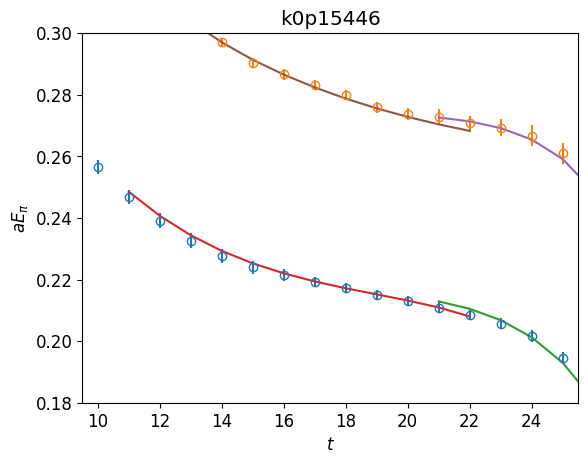

10.780436205934027 {'a': 0.0001706(55), 'E': 0.2174(13)}
2.8535598745151556 {'a0': 2(42)e-08, 'E0': -0.26(67), 'a1': 0.078(12), 'E1': 0.2119(77), 'a2': 0.275(86), 'E2': 0.484(65)}
2.094373471745864 {'a': 6.41(20)e-06, 'E': 0.2744(21)}
10.970169491679377 {'a0': 0.043(41), 'E0': 0.42(12), 'a1': 0.0126(71), 'E1': 0.255(18), 'a2': 0.5(2.5), 'E2': 0.88(67)}


In [19]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.title(kappa)
plt.ylim(0.18,0.30)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [20]:
print("Cosh mpi/mrho=", 0.2174/0.2744)
print("Exp mpi/mrho=",0.2119/0.255)

Cosh mpi/mrho= 0.7922740524781342
Exp mpi/mrho= 0.8309803921568627


In [21]:
kappa="k0p15464"
corrPI=data[kappa][5]
corrRHO=(data[kappa][0]+data[kappa][1]+data[kappa][2])/3.0
ts = np.array([t for t in range(int(NT/2))])

cut=20
bin=4

nmean = lambda data : np.mean(data,axis=0)

fitData=jackKnifeCov(nmean, corrPI[cut:,:], bin)
pibestFit, pibestFitTimes = get_best_cosh_fit(fitData, NT)
pibestFit2, pibestFit2Times = get_best_exp_fit(fitData, NT)

fitData=jackKnifeCov(nmean, corrRHO[cut:,:], bin)
rhobestFit, rhobestFitTimes = get_best_cosh_fit(fitData, NT)
rhobestFit2, rhobestFit2Times = get_best_exp_fit(fitData, NT)

pidata=jackKnife(log_eff_mass, corrPI[cut:,:], bin)
rhodata=jackKnife(log_eff_mass, corrRHO[cut:,:], bin)

paramsDict = lambda d : {key: d[key].mean for key in d}

pifitparams=paramsDict(pibestFit.p)
pifitFuncdata=[np.log(cosh_fit(t,pifitparams,NT)/cosh_fit(t+1,pifitparams,NT)) for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)]
pifit2params=paramsDict(pibestFit2.p)
pifit2Funcdata=[np.log(three_exp(t,pifit2params)/three_exp(t+1,pifit2params)) for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)]

rhofitparams=paramsDict(rhobestFit.p)
rhofitFuncdata=[np.log(cosh_fit(t,rhofitparams,NT)/cosh_fit(t+1,rhofitparams,NT)) for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)]
rhofit2params=paramsDict(rhobestFit2.p)
rhofit2Funcdata=[np.log(three_exp(t,rhofit2params)/three_exp(t+1,rhofit2params)) for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)]

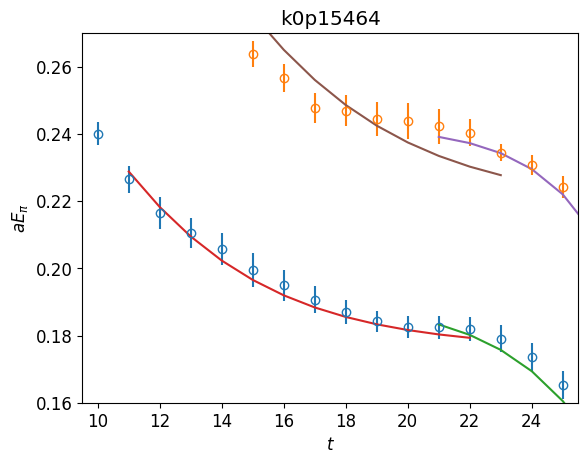

11.152274212101627 {'a': 0.000312(18), 'E': 0.1902(21)}
8.545360417501055 {'a0': 0.0544(31), 'E0': 0.1760(30), 'a1': 0.296(61), 'E1': 0.447(29), 'a2': -10.04574597181787432020882988581433892250061035156250(12), 'E2': 10.483520193591584046544085140340030193328857421875(13)}
3.937975270982688 {'a': 0.00001294(29), 'E': 0.2421(21)}
82.38011091431723 {'a0': 0.098(16), 'E0': 0.475(25), 'a1': 0.0065(11), 'E1': 0.2187(58), 'a2': 33(1205), 'E2': 1.8(4.6)}


In [25]:
plt.errorbar([t for t in range(int(NT/2)-1)], pidata[0], pidata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.errorbar([t for t in range(int(NT/2)-1)], rhodata[0], rhodata[1], linestyle="None", marker="o", markerfacecolor="None")
plt.plot([t for t in range(pibestFitTimes[0], pibestFitTimes[1]+1)],pifitFuncdata)
plt.plot([t for t in range(pibestFit2Times[0], pibestFit2Times[1]+1)],pifit2Funcdata)
plt.plot([t for t in range(rhobestFitTimes[0], rhobestFitTimes[1]+1)],rhofitFuncdata)
plt.plot([t for t in range(rhobestFit2Times[0], rhobestFit2Times[1]+1)],rhofit2Funcdata)
plt.title(kappa)
plt.ylim(0.16,0.27)
plt.xlim(9.5,25.5)
plt.xlabel(r'$t$')
plt.ylabel(r'$aE_{\pi}$')
plt.show()

for f in [pibestFit, pibestFit2, rhobestFit, rhobestFit2]:
    print(f.chi2, f.p)

In [23]:
print("Cosh mpi/mrho=", 0.1902/0.2421)
print("Exp mpi/mrho=",0.1760/0.2187)

Cosh mpi/mrho= 0.7856257744733581
Exp mpi/mrho= 0.8047553726566071


In [24]:
0.185/0.245

0.7551020408163265